### Reckitt 4 - Bryan Alberto Coronado García

#### Importación de librerías y carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

cwd = os.getcwd()
os.chdir('/Users/bryancoronado/Desktop/EBAC/RECKITT/RECKITT 4')
cwd

'/content'

In [ ]:
# Carga del dataframe principal consolidado en la actividad anterior.

df = pd.read_csv('df_final.csv')
df.sample(5)

,WEEK,MONTH,YEAR,ID_CATEGORY,MANUFACTURER,BRAND,SEGMENT,FORMAT_x,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,REGION
15781,16-22,4,2022,1,CHURCH & DWIGHT,OXI CLEAN,BLEACH,LIQUIDO,7501080955486,0.686,54.424,TOTAL AUTOS AREA 2
45233,38-22,9,2022,1,INDS. H24,CUELLOS PUNOS Y MANCHITAS,BLEACH,LIQUIDO,7501021160719,2.274,118.381,TOTAL AUTOS SCANNING MEXICO
55927,51-22,12,2022,1,RECKITT,VANISH,BLEACH,BARRA,7501058714596,9.365,117.552,TOTAL AUTOS AREA 2
54471,49-22,12,2022,1,RECKITT,VANISH,BLEACH,GEL,7501058716767,0.674,91.412,TOTAL AUTOS AREA 2
46057,39-22,10,2022,1,RECKITT,VANISH,BLEACH,LIQUIDO,7501058751461,1.557,271.229,TOTAL AUTOS SCANNING MEXICO


In [ ]:
df['BRAND'] = df['BRAND'].astype('string')
df['MANUFACTURER'] = df['MANUFACTURER'].astype('string')
df['SEGMENT'] = df['SEGMENT'].astype('string')
df['REGION'] = df['REGION'].astype('string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57348 entries, 0 to 57347
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WEEK               57348 non-null  object 
 1   MONTH              57348 non-null  int64  
 2   YEAR               57348 non-null  int64  
 3   ID_CATEGORY        57348 non-null  int64  
 4   MANUFACTURER       57348 non-null  string 
 5   BRAND              57348 non-null  string 
 6   SEGMENT            57348 non-null  string 
 7   FORMAT_x           57348 non-null  object 
 8   ITEM               57348 non-null  object 
 9   TOTAL_UNIT_SALES   57348 non-null  float64
 10  TOTAL_VALUE_SALES  57348 non-null  float64
 11  REGION             57348 non-null  string 
dtypes: float64(2), int64(3), object(3), string(4)
memory usage: 5.3+ MB


#### Identificación de variables importantes y posibles preguntas de negocio

In [ ]:
print("""Posibles preguntas:

¿Cómo se han distribuido las ventas en las regiones?
¿Cuáles son los productos más vendidos y los menos vendidos?
¿Cómo han evolucionado las ventas a lo largo del tiempo?
¿Existe alguna relación entre el precio, el producto, y sus ventas?
¿Es posible identificar outliers que puedan influir en las ventas?

Variables importantes a considerar en el DataFrame para realizar un EDA que responda a estas preguntas:

- WEEK
- YEAR
- MANUFACTURER
- BRAND
- SEGMENT
- TOTAL VALUE SALES
- REGION
""")

Posibles preguntas:

¿Cómo se han distribuido las ventas en las regiones?
¿Cuáles son los productos más vendidos y los menos vendidos?
¿Cómo han evolucionado las ventas a lo largo del tiempo?
¿Existe alguna relación entre el precio, el producto, y sus ventas?
¿Es posible identificar outliers que puedan influir en las ventas?

Variables importantes a considerar en el DataFrame para realizar un EDA que responda a estas preguntas:

- WEEK
- YEAR
- MANUFACTURER
- BRAND
- SEGMENT
- TOTAL VALUE SALES
- REGION



#### Distribución de ventas

 Apesar de la basta cantidad de productos en venta, el mercado de RECKITT esta basado principalmente en sus 5 productos principales que son:

1) CLORALEX
2) VANISH
3) CLOROX
4) DR. BECKMANN
5) OXI CLEAN


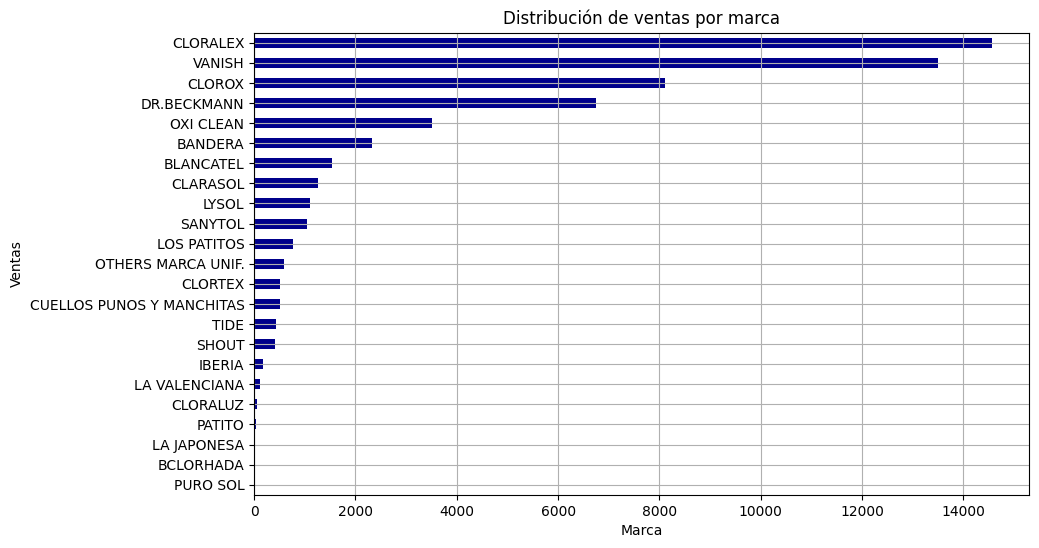

In [ ]:
# Distribución por marca

df.groupby('BRAND')['TOTAL_VALUE_SALES'].count().sort_values(ascending=True).plot.barh(
    title='Distribución de ventas por marca',
    xlabel='Marca',
    ylabel='Ventas',
    grid=True,
    figsize=(10, 6),
    color='darkblue')

plt.savefig('distribucion_marca.png', dpi=400, pad_inches=0.2)

print(""" Apesar de la basta cantidad de productos en venta, el mercado de RECKITT esta basado principalmente en sus 5 productos principales que son:\n
1) CLORALEX
2) VANISH
3) CLOROX
4) DR. BECKMANN
5) OXI CLEAN""")

 Siendo evidente la dominante región de SCANNING posiblemente debido a ser la matriz principal de distribución para venta, siguen de cerca las áreas 2 y 5, siendo además el área 1 la más deficiente en números


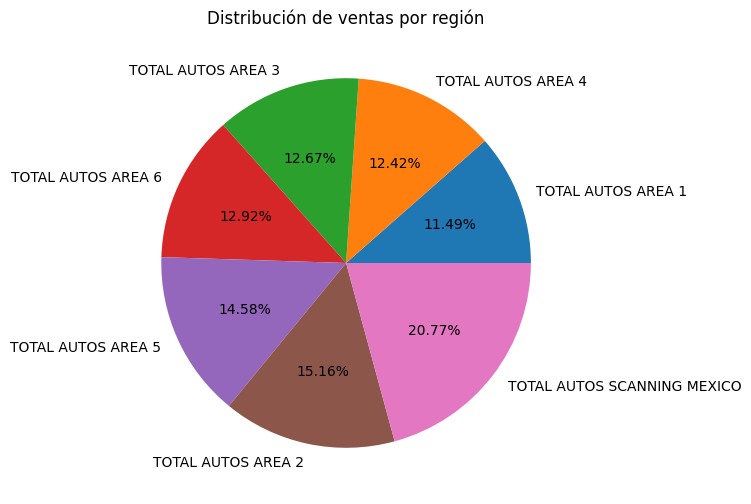

In [ ]:
# Distribución por region

df.groupby('REGION')['TOTAL_VALUE_SALES'].count().sort_values(ascending=True).plot.pie(
    title='Distribución de ventas por región',
    xlabel='Marca',
    ylabel='',
    autopct='%1.2f%%',
    figsize=(10, 6))

plt.savefig('distribucion_region.png', dpi=400, pad_inches=0.2)

print(""" Siendo evidente la dominante región de SCANNING posiblemente debido a ser la matriz principal de distribución para venta, siguen de cerca las áreas 2 y 5, siendo además el área 1 la más deficiente en números""")

#### Analisis la tendencia de ventas en el tiempo

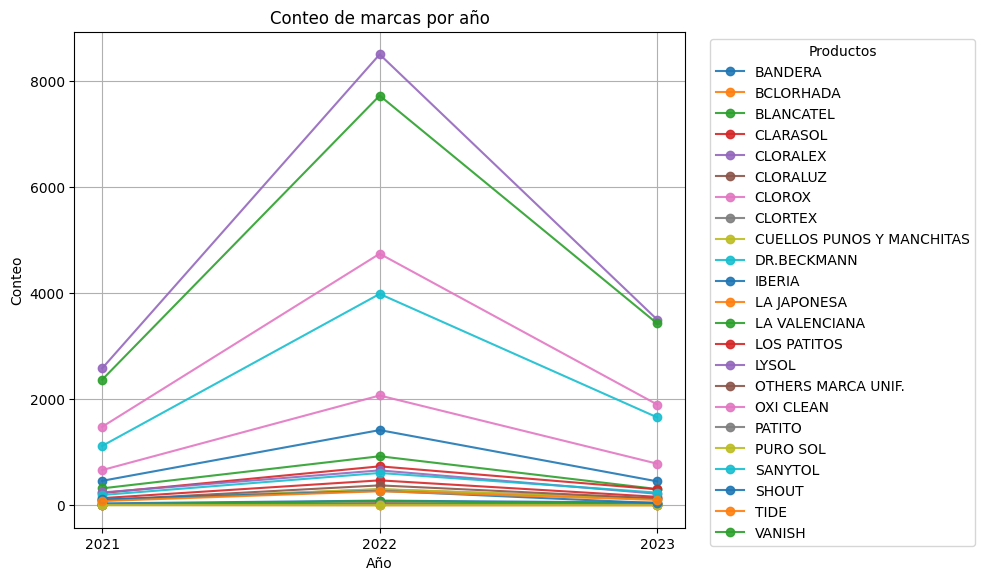

In [ ]:
# Conteo de ventas por marca

df_brand_counts = df.groupby(['YEAR', 'BRAND']).size().unstack(fill_value=0)

df_brand_counts.plot(
    kind='line',
    marker='o',
    figsize=(10,6),
    grid=True,
    alpha=0.9,
    title='Conteo de marcas por año',
    xlabel='Año',
    ylabel='Conteo',
    xticks=df_brand_counts.index)

plt.legend(title='Productos', bbox_to_anchor=(1.03, 1), loc='upper left')
plt.tight_layout()
plt.savefig('conteo_marca_año.png', dpi=400, pad_inches=0.2)
plt.show()

print(""" Respecto al conteo de ventas independiente a la cantidad en monto, va como lider CLORALEX, hablando esto de una correlación directa entre cantidad y monto""")

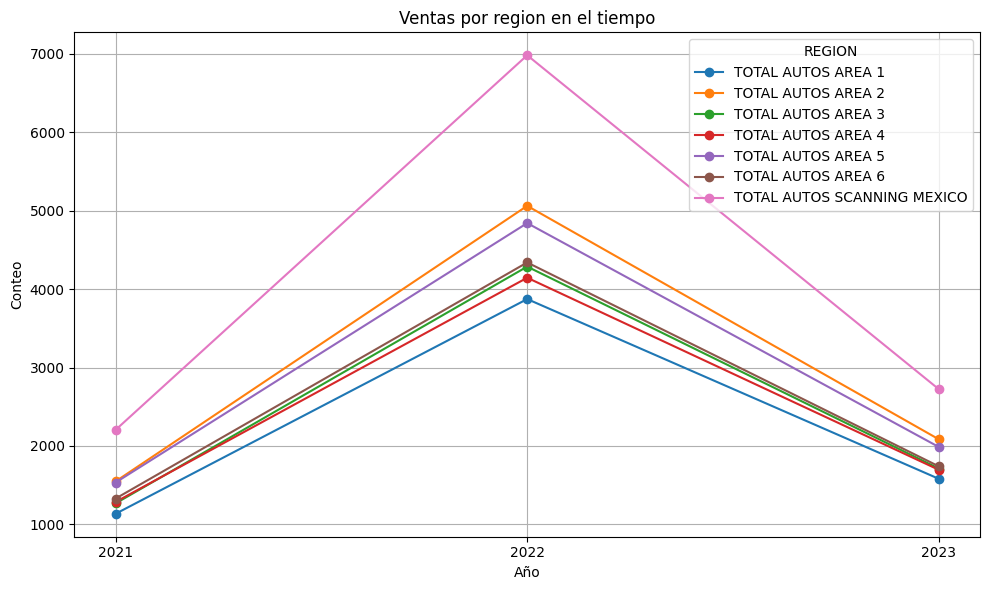

In [ ]:
# Conteo de ventas por región

df_region_counts = df.groupby(['YEAR', 'REGION']).size().unstack(fill_value=0)

df_region_counts.plot(
    kind='line',
    marker='o',
    figsize=(10,6),
    xlabel='Año',
    ylabel='Conteo',
    title='Ventas por region en el tiempo',
    grid=True,
    xticks=df_region_counts.index)

plt.tight_layout()
plt.savefig('conteo_region_año.png', dpi=400, pad_inches=0.2)
plt.show()

print(""" Es adecuado considerar que el año 2022 fue destacado en comparación a los otros dos entre los datos, los datos no nos especifican el motivo, pero se pueden tomar en cuenta posibles campañas que ayudaron a mejorar el desempeño
de la empresa, este es un insight importante debido a que, con mayores datos se pueden evaluar cuales fueron los factores que ayudaron a este desempeño.""")

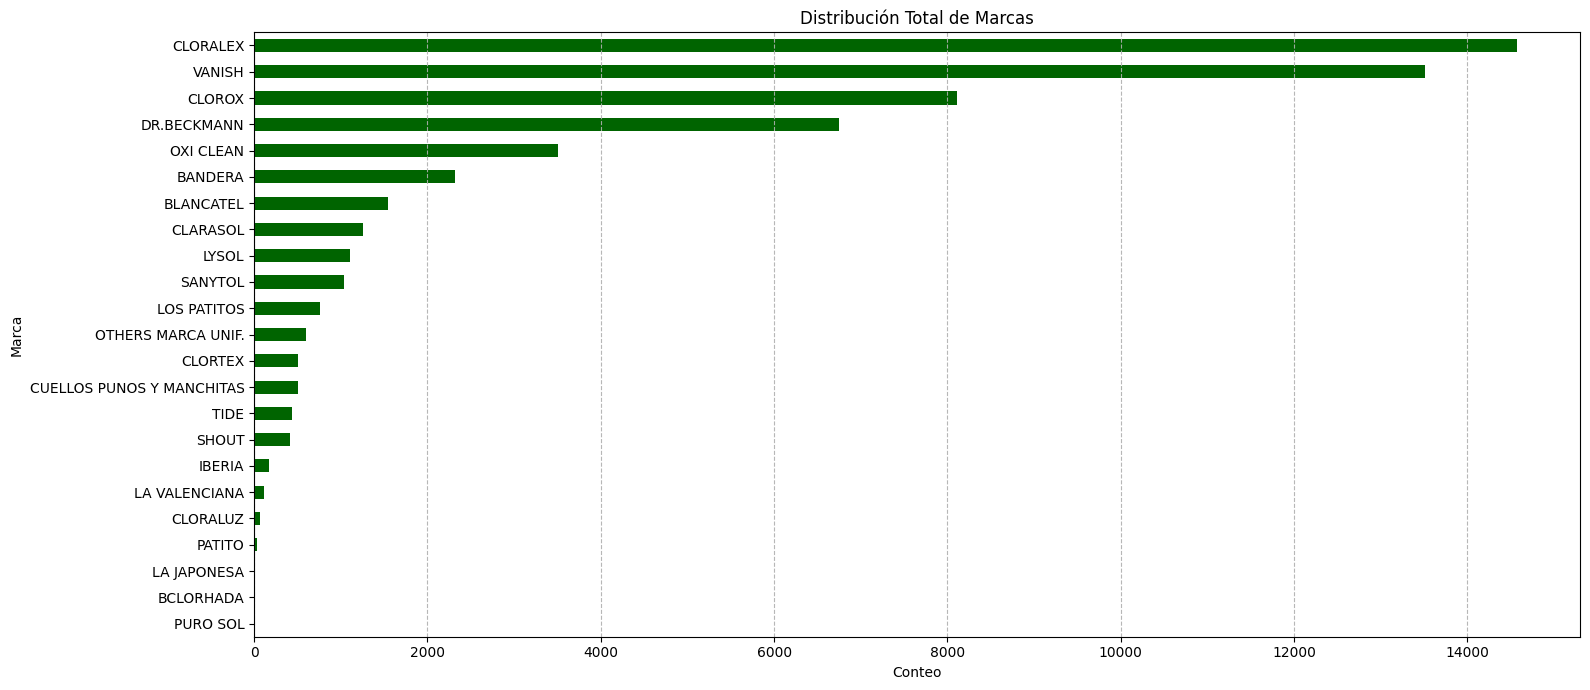

In [ ]:
# Conteo de ventas por productos

brand = df['BRAND'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(16, 7))

brand.plot(kind='barh', color='darkgreen', figsize=(16,7))
ax.set_title('Distribución Total de Marcas')
ax.set_xlabel('Conteo')
ax.set_ylabel('Marca')
ax.tick_params(axis='x')
ax.grid(axis='x', alpha=0.9, linestyle='--')

plt.tight_layout()
plt.savefig('conteo_marca.png', dpi=400, pad_inches=0.2)
plt.show()

#### Exploración de la relación entre diferentes variables

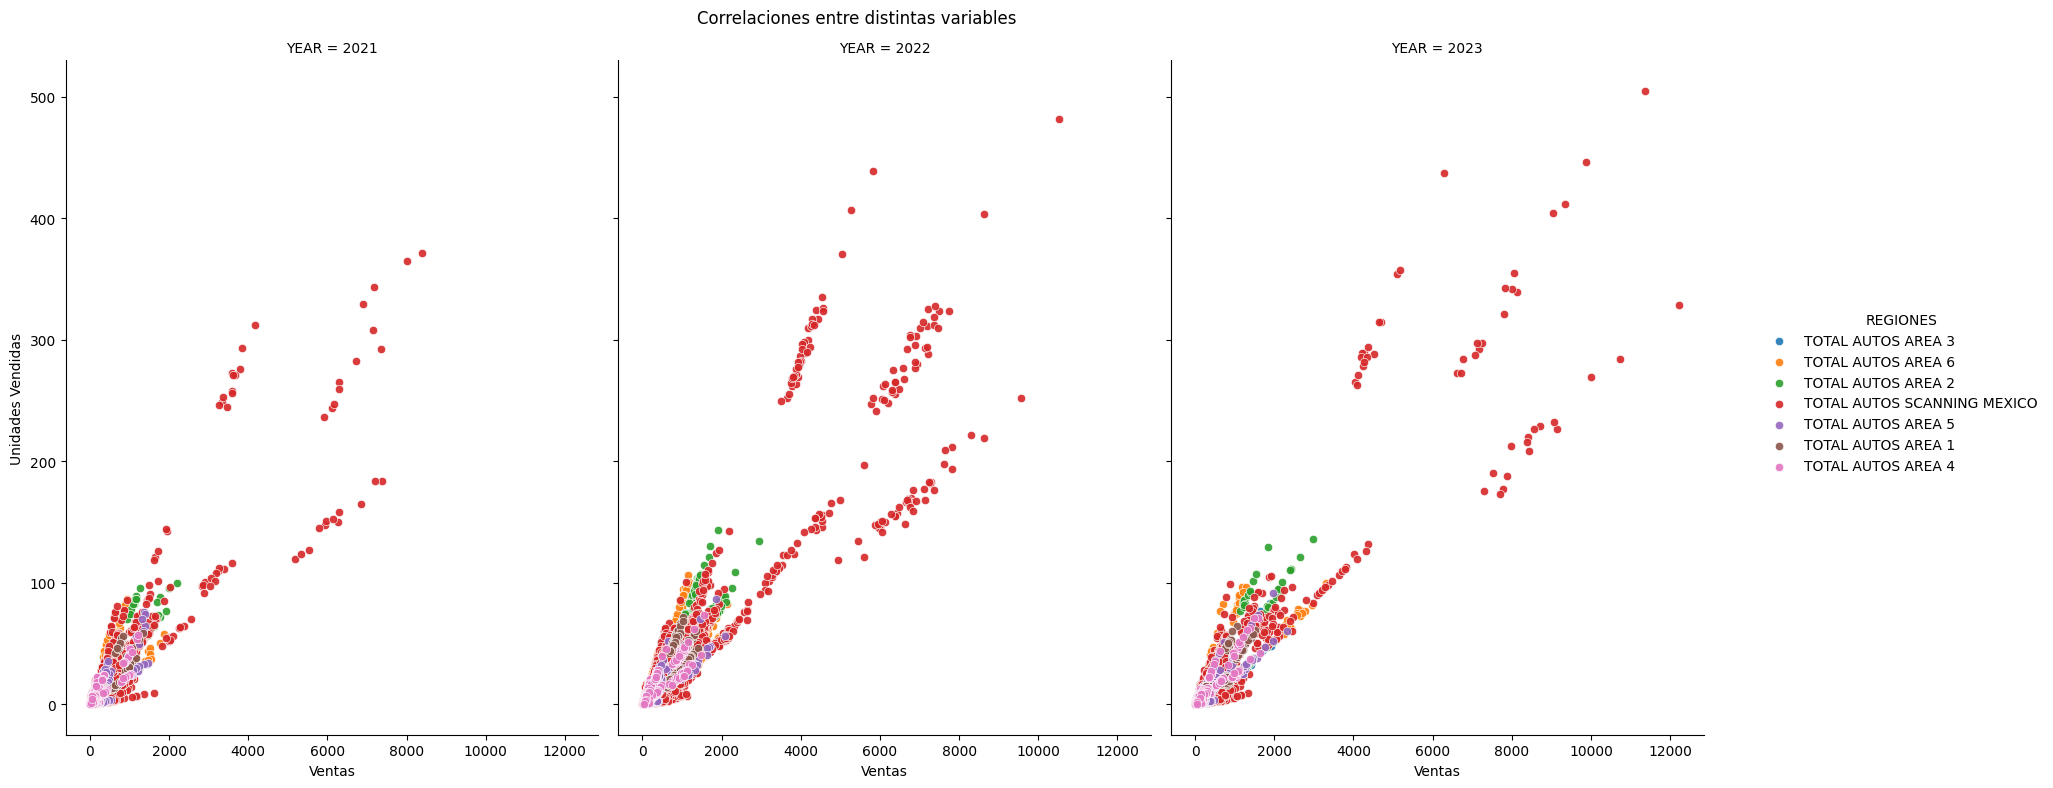

In [ ]:
# Correlación entre el monto de ventas y las unidades vendidas, segun el año, seccionado por región.

g = sns.FacetGrid(df, col='YEAR', hue='REGION',  col_wrap=3, height=8, aspect=0.6)

g.map(sns.scatterplot, 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_SALES', alpha=0.9)
g.add_legend(title="REGIONES", bbox_to_anchor=(1.02, 0.5), loc='center left')
g.set_axis_labels('Ventas', 'Unidades Vendidas')
g.fig.suptitle('Correlaciones entre distintas variables')

plt.tight_layout()
plt.savefig('relacion_variables.png', dpi=400, pad_inches=0.2)
plt.show()

print(""" Es interesante destacar que el año 2021 tiene una aparentemente ligera menor correlación entre la cantidad de unidades y el monto vendido, esto nos puede ayudar a intuir que en años posteriores
se pudieron tomar mejores alternativas en el mercado para reajustar costos y "nivelar" esta relación, evitando posibles perdidas.""")

#### Visualizar la distribución geográfica de las ventas

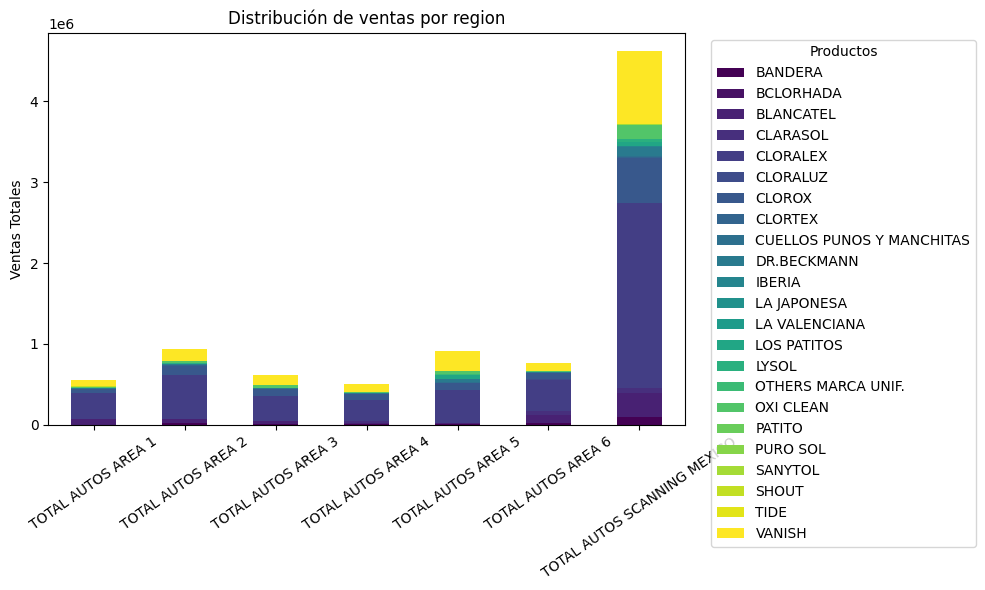

In [ ]:
df_pivot = df.groupby(['REGION', 'BRAND'])['TOTAL_VALUE_SALES'].sum().unstack(fill_value=0)

plt.figure(figsize=(10,6))
df_pivot.plot(kind='bar',
              stacked=True,
              cmap='viridis',
              ax=plt.gca())

plt.title('Distribución de ventas por region')
plt.xlabel('')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=35)
plt.legend(title='Productos', bbox_to_anchor=(1.03, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribucion_geografica.png', dpi=400, pad_inches=0.2)
plt.show()

print(""" En este grafico es posible comenzar a considerar tomar acciones que ayuden a verificar porque las áreas 1, 3, y 4, estan deficientes en comparación al resto, con fin de tomar medidas que potencien las ventas """)

#### Outliers & Anomalías

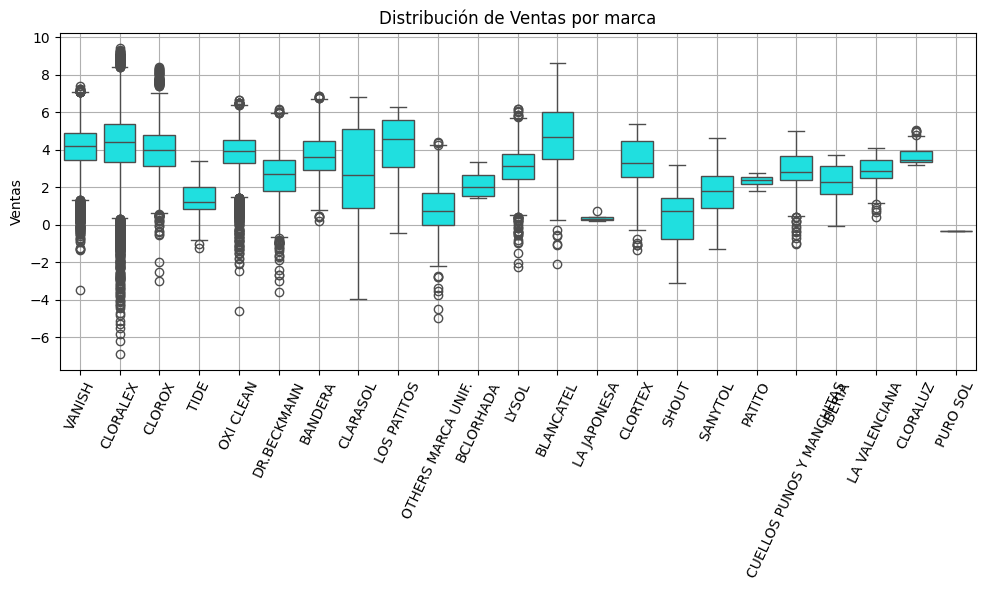

In [ ]:
df['TOTAL_VALUE_SALES_LOG'] = np.log(df['TOTAL_VALUE_SALES']) # Transformación logarítimca de datos para manejo de valores atípicos

# Boxplot por BRAND
plt.figure(figsize=(10,6))
sns.boxplot(x='BRAND', y='TOTAL_VALUE_SALES_LOG', data=df, color='cyan')

plt.title('Distribución de Ventas por marca')
plt.xlabel('')
plt.ylabel('Ventas')
plt.xticks(rotation=65)
plt.grid(True)
plt.gca()
plt.tight_layout()
plt.savefig('boxplot_marca.jpg', dpi=400, bbox_inches='tight')
plt.show()

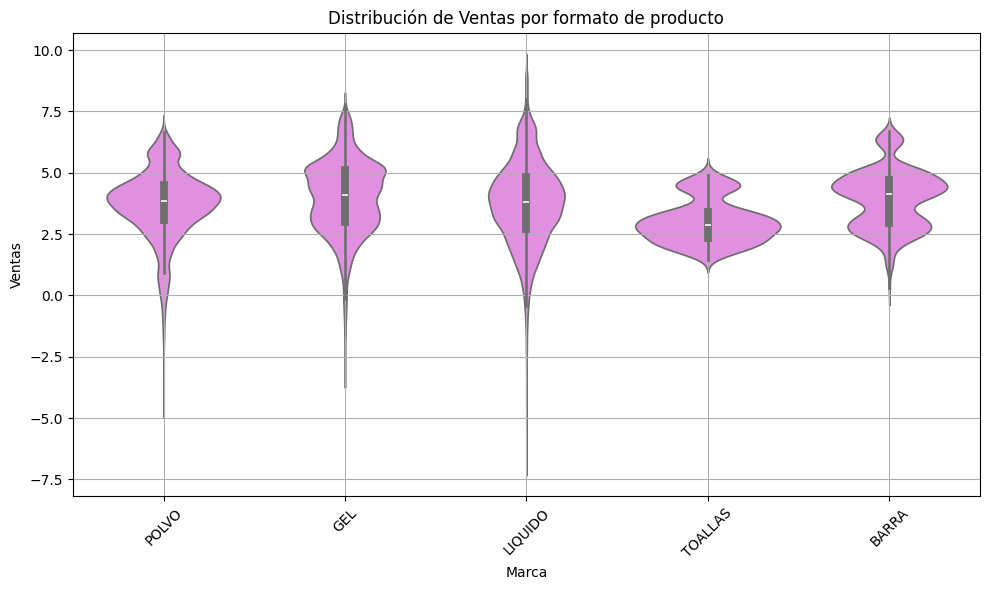

In [ ]:
# Boxplot por FORMATO
plt.figure(figsize=(10, 6))
sns.violinplot(x='FORMAT_x', y='TOTAL_VALUE_SALES_LOG', data=df, color='violet')
plt.title('Distribución de Ventas por formato de producto')
plt.xlabel('Marca')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca()
plt.tight_layout()
plt.savefig('boxplot_formato.png', dpi=400, pad_inches=0.2)
plt.show()

print(""" La graficación de los formatos vendidos nos ayuda a evidenciar el destaque de los productos tipo liquido en comparación a los menos populares como las barras y los geles, esto puede ser aprovechado para aumentar los productos en tipo líquido
que parecen facilitar su uso, por ello, aumentando su venta. """)

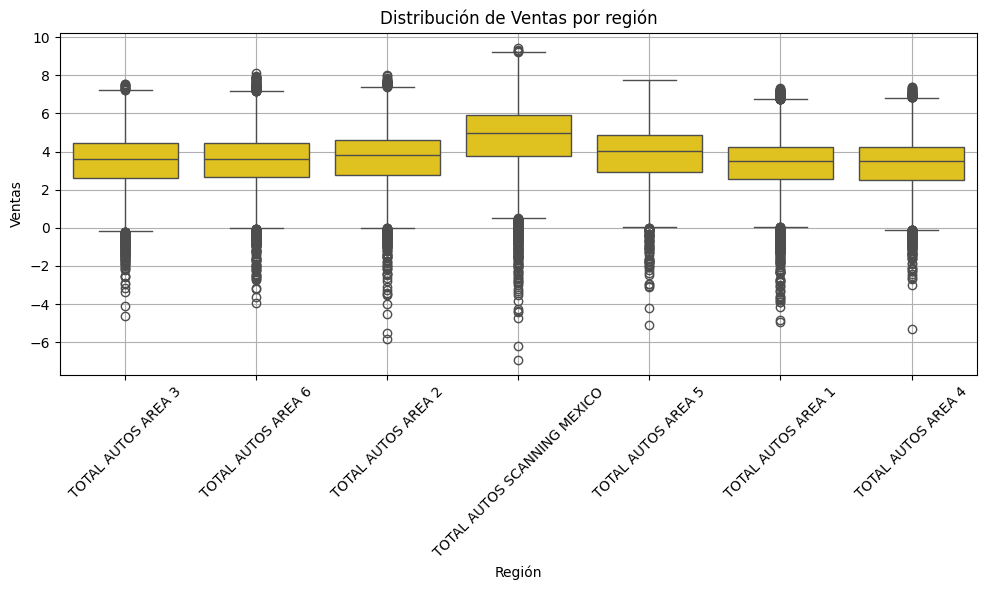

In [ ]:
# Boxplot por REGION
plt.figure(figsize=(10, 6))
sns.boxplot(x='REGION', y='TOTAL_VALUE_SALES_LOG', data=df, color='gold')
plt.title('Distribución de Ventas por región')
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca()
plt.tight_layout()
plt.savefig('boxplot_region.png', dpi=400, pad_inches=0.2)
plt.show()

print(""" Los boxplot realizados a las regiones nos ayudan a ver una enorme cantidad de outliers a pesar de haber manejado datos atípicos con transformaciones logarítimicas, dando a entender una buena cantidad
de ventas no llevan algun patrón, esto debido a la venta minorista de zonas que no se estan considerando y deberían considerarse como sub-areas para llegar un mejor control de cada área.""")

#### Gráficos adicionales

In [ ]:
# Carga del dataframe de ventas por regiones

regions = pd.read_csv('regions_sales.csv')
regions

,REGION,TOTAL_VALUE_SALES
0,TOTAL AUTOS SCANNING MEXICO,5134179.113
1,TOTAL AUTOS AREA 2,1090858.882
2,TOTAL AUTOS AREA 5,1016401.053
3,TOTAL AUTOS AREA 6,872174.229
4,TOTAL AUTOS AREA 3,823067.704
5,TOTAL AUTOS AREA 1,613581.360
6,TOTAL AUTOS AREA 4,590438.848


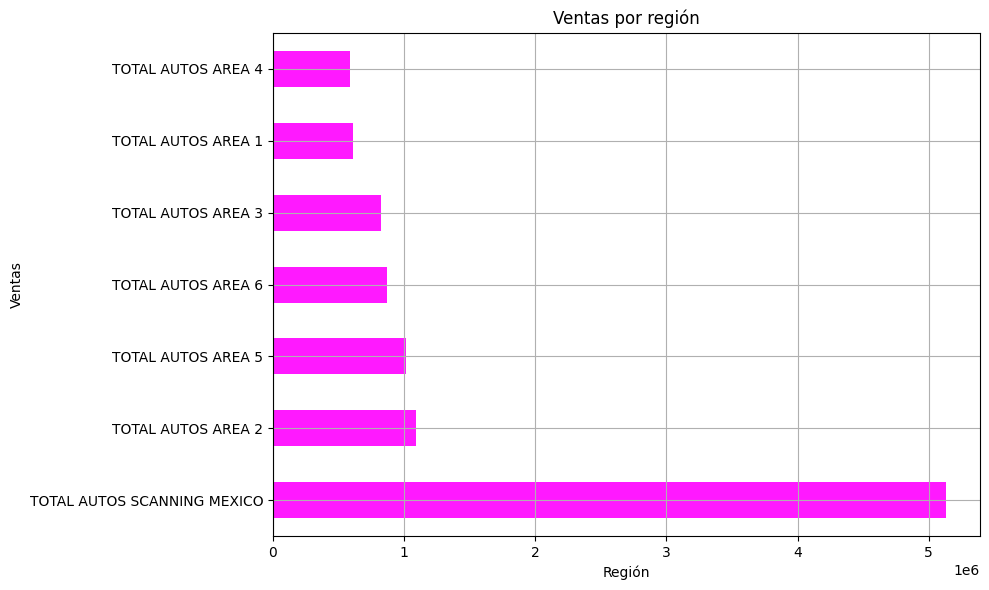

In [ ]:
regions.plot.barh(x='REGION',
                 y='TOTAL_VALUE_SALES',
                 xlabel='Región',
                 ylabel='Ventas',
                 title='Ventas por región',
                 legend=False,
                 grid=True,
                 figsize=(10, 6),
                 alpha=0.9,
                 color='magenta')

plt.tight_layout()
plt.savefig('ventas_por_region.png', dpi=400, pad_inches=0.2)
plt.show()